# The link between Major and Employment

We will examine a clean dataset provided by [fivethirtyeight of recent grads](https://github.com/fivethirtyeight/data/tree/master/college-majors) to examine the effects of popular majors on salary and employment after graduation.  

Here is some information about the data columns:

|Header|Description|
|:---|:---|
|Rank|Rank by median earnings|
|Major_code|Major code, FO1DP in ACS PUMS|
|Major|Major description|
|Major_category|Category of major from Carnevale et al|
|Total|Total number of people with major|
|Sample_size|Sample size (unweighted) of full-time, year-round ONLY (used for earnings)|
|Men|Male graduates|
|Women|Female graduates|
|ShareWomen|Women as share of total|
|Employed|Number employed (ESR == 1 or 2)|
|Full_time|Employed 35 hours or more|
|Part_time|Employed less than 35 hours|
|Full_time_year_round|Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)|
|Unemployed|Number unemployed (ESR == 3)|
|Unemployment_rate|Unemployed / (Unemployed + Employed)|
|Median|Median earnings of full-time, year-round workers|
|P25th|25th percentile of earnigns|
|P75th|75th percentile of earnings|
|College_jobs|Number with job requiring a college degree|
|Non_college_jobs|Number with job not requiring a college degree|
|Low_wage_jobs|Number in low-wage service jobs|

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.iloc[0]) #Print first record

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [2]:
#Let's get a general feel of the data records:
print(recent_grads.head())
print(recent_grads.tail())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  ...  \
0   2057.0    282.0    Engineering    0.120564           36      1976  ...   
1    679.0     77.0    Engineering    0.101852            7       640  ...   
2    725.0    131.0    Engineering    0.153037            3       648  ...   
3   1123.0    135.0    Engineering    0.107313           16       758  ...   
4  21239.0  11021.0    Engineering    0.341631          289     25694  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
0  

In [3]:
#Let's see the dataset statistics:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Clean the data

I will start by removing any rows with missing vlaues so matplotlib runs smoothly.

In [4]:
#How many rows are we starting with?
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [5]:
#Drop all rows with null values
recent_grads = recent_grads.dropna()
#How many rows do we end up?
cleaned_data_count = recent_grads.shape[0]
#There was only one row with null values
print(cleaned_data_count)

172


## Scatter Plots

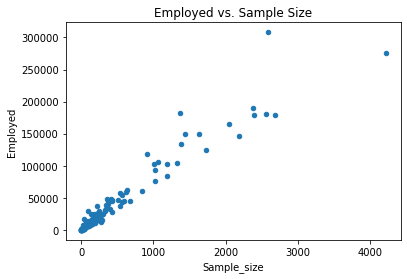

In [6]:
recent_grads.plot(x="Sample_size",y="Employed",kind="scatter", title="Employed vs. Sample Size")

Text(0.5, 1.0, 'Unemployed vs. Sample Size')

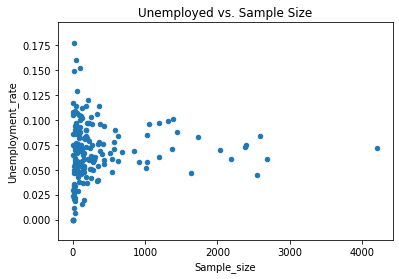

In [7]:
ax = recent_grads.plot(x="Sample_size",y="Unemployment_rate",kind="scatter")
ax.set_title('Unemployed vs. Sample Size')

Text(0.5, 1.0, 'Median Income vs. Sample Size')

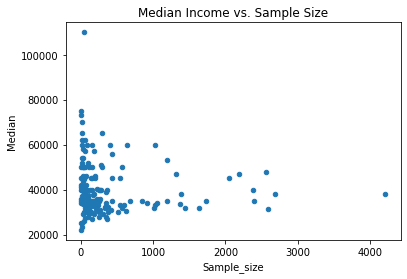

In [8]:
ax = recent_grads.plot(x="Sample_size",y="Median",kind="scatter")
ax.set_title('Median Income vs. Sample Size')

Text(0.5, 1.0, 'Full Time Employees vs. Median Income')

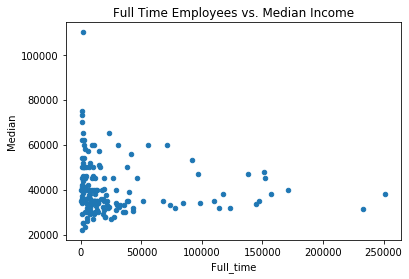

In [9]:
ax = recent_grads.plot(x="Full_time",y="Median",kind="scatter")
ax.set_title('Full Time Employees vs. Median Income')

Text(0.5, 1.0, 'Women vs. Unemployed')

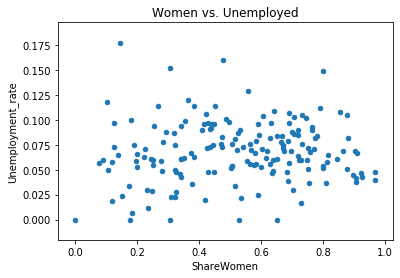

In [10]:
ax = recent_grads.plot(x="ShareWomen",y="Unemployment_rate",kind="scatter")
ax.set_title('Women vs. Unemployed')

Text(0.5, 1.0, 'Men vs. Median Income')

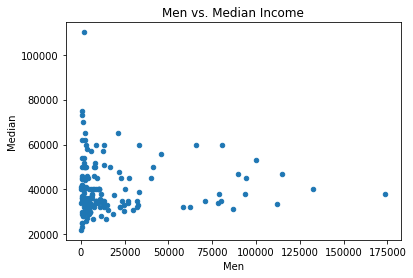

In [11]:
ax = recent_grads.plot(x="Men",y="Median",kind="scatter")
ax.set_title('Men vs. Median Income')

Text(0.5, 1.0, 'Women vs. Median Income')

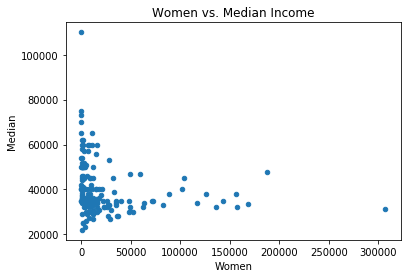

In [12]:
ax = recent_grads.plot(x="Women",y="Median",kind="scatter")
ax.set_title('Women vs. Median Income')

Scatter Plot Conlusions:
- We can see from the first two graphs that the more popular the major, the more likely they were to be employed after graduations
- The next two graphs show income isn't dependent on major popularity.
- The last two graphs show that the majority of men and women make less than \\$50,000. 
- But, men are more likely to make between \\$50,000 and \\$150,000 than women.

## Histograms

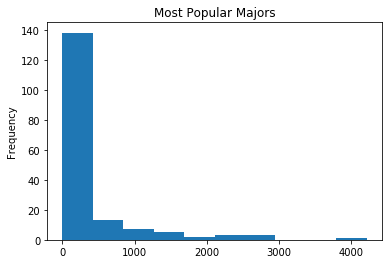

In [13]:
recent_grads['Sample_size'].plot(kind='hist',title="Most Popular Majors")

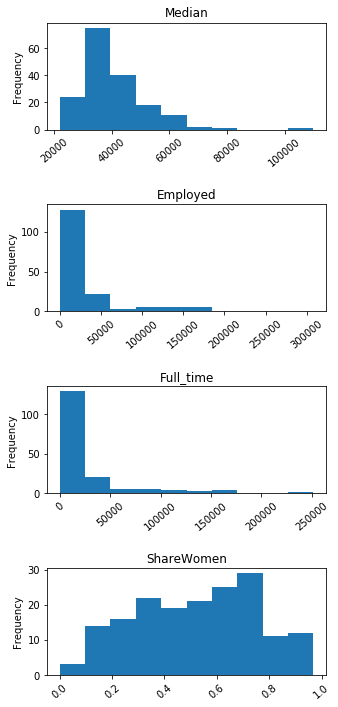

In [14]:
cols = ['Sample_size','Median','Employed', 'Full_time','ShareWomen','Unemployment_rate','Men', 'Women']

fig = plt.figure(figsize=(5,12))
plt.subplots_adjust(hspace=0.7)
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[cols[r]].plot(kind='hist',title=(cols[r]),rot=40)

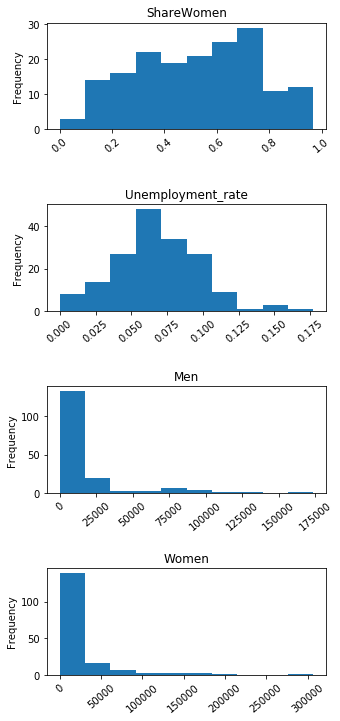

In [15]:
fig = plt.figure(figsize=(5,12))
plt.subplots_adjust(hspace=0.7)
for r in range(4,8):
    ax=fig.add_subplot(4,1,r-3)
    ax=recent_grads[cols[r]].plot(kind='hist',title=cols[r],rot=40)

Histogram Conclusions:

- Most majors have low rates of employment as well as full time employment.
- Women make up 70-80% of most majors, but the majority of majors have less than 80% of women in them.
- Most majors have a 5% chance of unemployment, but stay mainly below 12%.
- Most majors make between \\$30k-\\$40k.

Text(0.5, 1, 'Income as it relates to Popular Major')

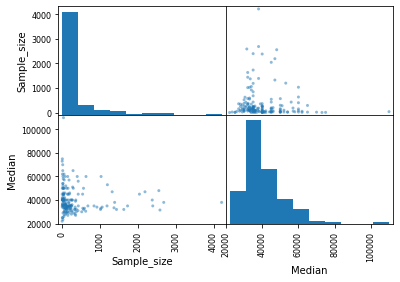

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size','Median']])
ax.set_title("Income as it relates to Popular Major")

Conclusion of **Income** as it relates to **Popular Major**
- The more popular majors make around \\$40k.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fce9a10>,
      dtype=object)

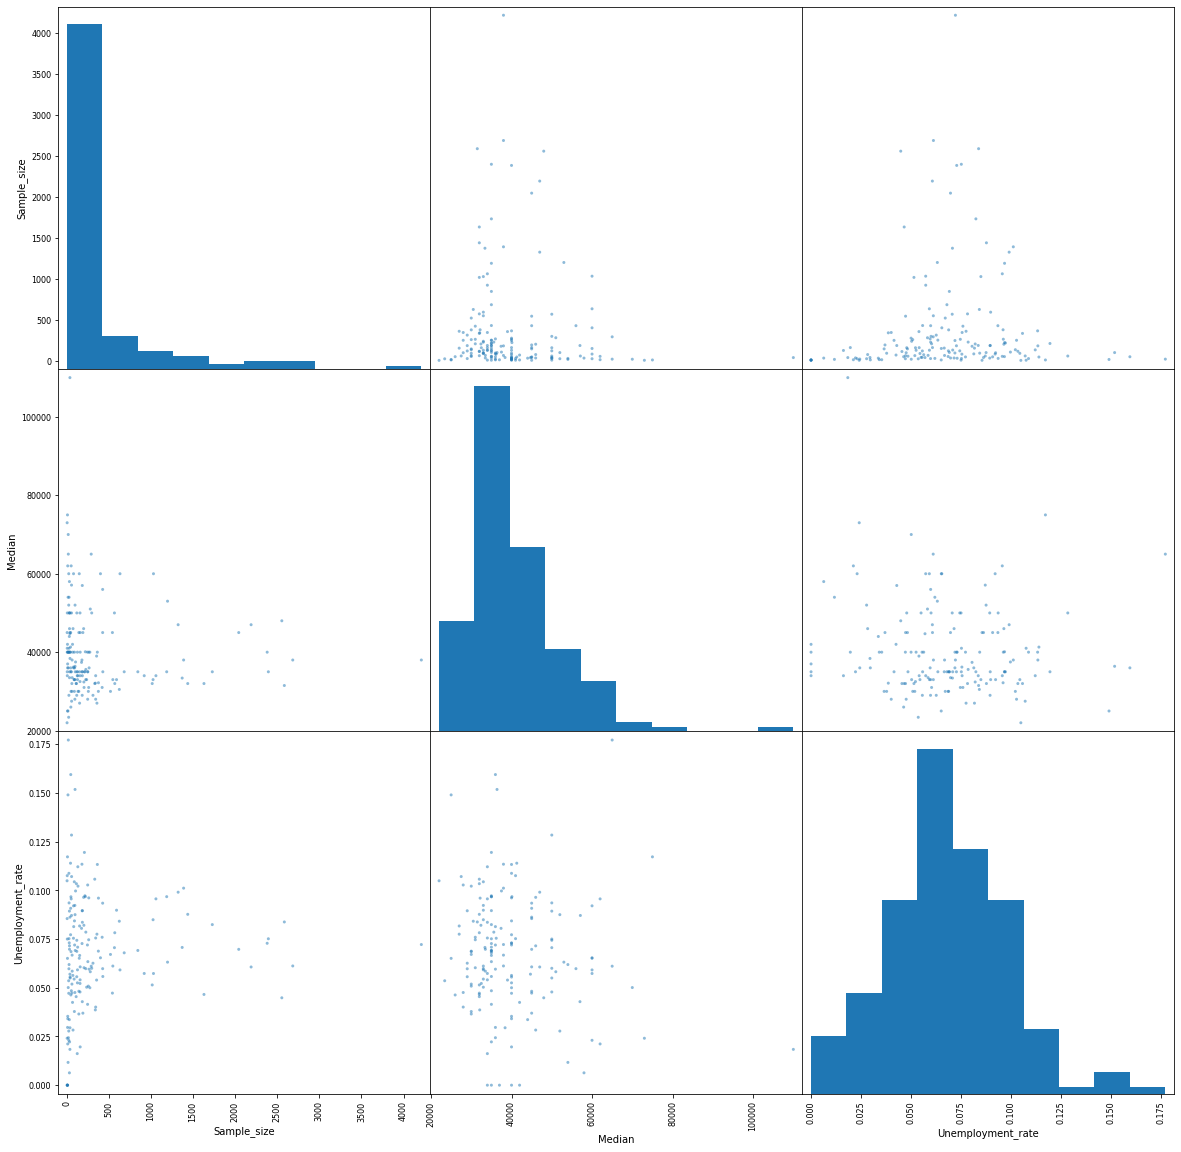

In [17]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize=(20,20))

## Conclusion of Scatter Matrix plots:

The more popular majors create unstable employment for graduating students.  This may be due to more candidates willing to take unstable opportunities to break into the job market due to the overstaturation of candidates in a field.  This results in lower average income and more unemployment rates.  While those that graduate from less popular majors have higher incomes and lower unemployment rates.